In this assignment, you'll continue working with the U.S. Education Dataset from Kaggle. 
Don't forget to apply the most suitable missing-value-filling techniques from the previous checkpoint to the data.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline 

import seaborn as sns

from scipy import stats

In [2]:
states_df = pd.read_csv('states_all.csv')

In [3]:
states_df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


In [4]:
filled_df = states_df.interpolate(method ='linear', limit_direction ='both')

In [6]:
filled_df.isnull().sum()*100/filled_df.isnull().count()

PRIMARY_KEY                     0.0
STATE                           0.0
YEAR                            0.0
ENROLL                          0.0
TOTAL_REVENUE                   0.0
FEDERAL_REVENUE                 0.0
STATE_REVENUE                   0.0
LOCAL_REVENUE                   0.0
TOTAL_EXPENDITURE               0.0
INSTRUCTION_EXPENDITURE         0.0
SUPPORT_SERVICES_EXPENDITURE    0.0
OTHER_EXPENDITURE               0.0
CAPITAL_OUTLAY_EXPENDITURE      0.0
GRADES_PK_G                     0.0
GRADES_KG_G                     0.0
GRADES_4_G                      0.0
GRADES_8_G                      0.0
GRADES_12_G                     0.0
GRADES_1_8_G                    0.0
GRADES_9_12_G                   0.0
GRADES_ALL_G                    0.0
AVG_MATH_4_SCORE                0.0
AVG_MATH_8_SCORE                0.0
AVG_READING_4_SCORE             0.0
AVG_READING_8_SCORE             0.0
dtype: float64

### Consider the two variables: TOTAL_REVENUE and TOTAL_EXPENDITURE. Do these variables have outlier values?

In [7]:
 #Histogram

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = (10,5)

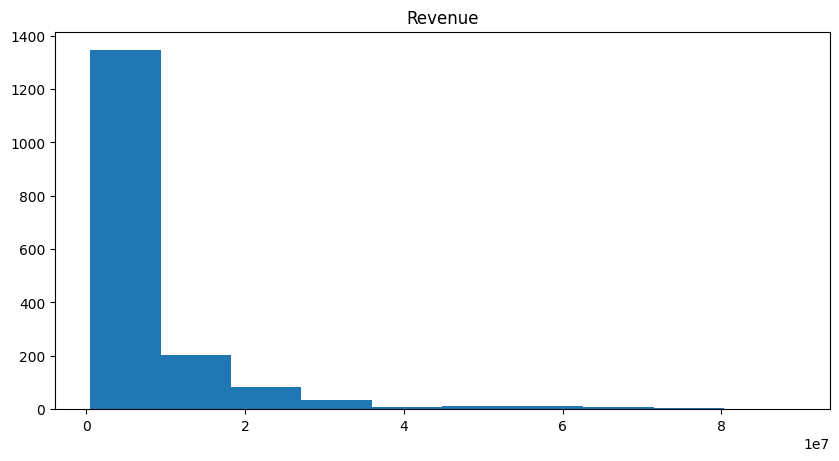

In [9]:
plt.hist(filled_df['TOTAL_REVENUE'])
plt.title("Revenue")
plt.show()

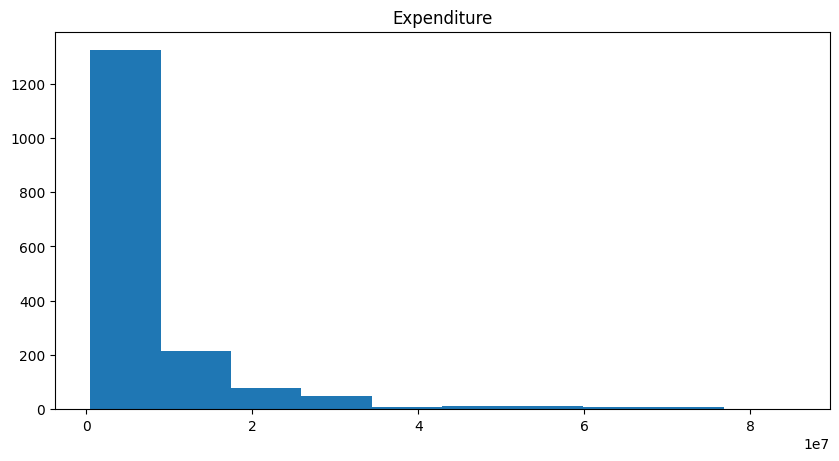

In [11]:
plt.hist(filled_df['TOTAL_EXPENDITURE'])
plt.title("Expenditure")
plt.show()

In [12]:
#Boxplot

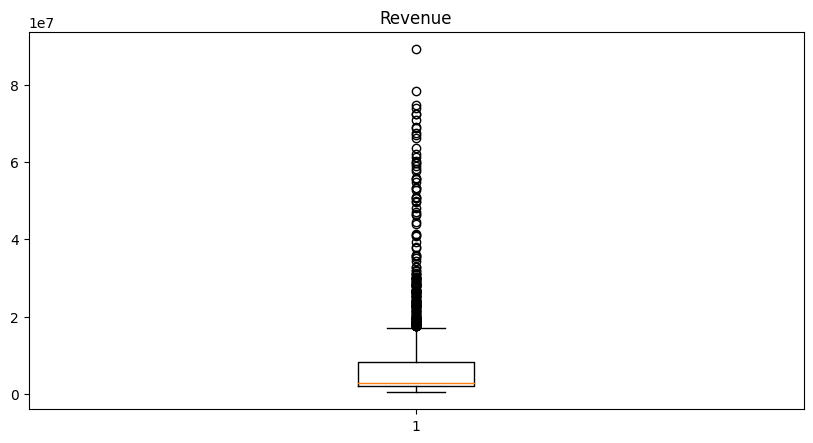

In [13]:
plt.boxplot(filled_df['TOTAL_REVENUE'])
plt.title("Revenue")
plt.show()

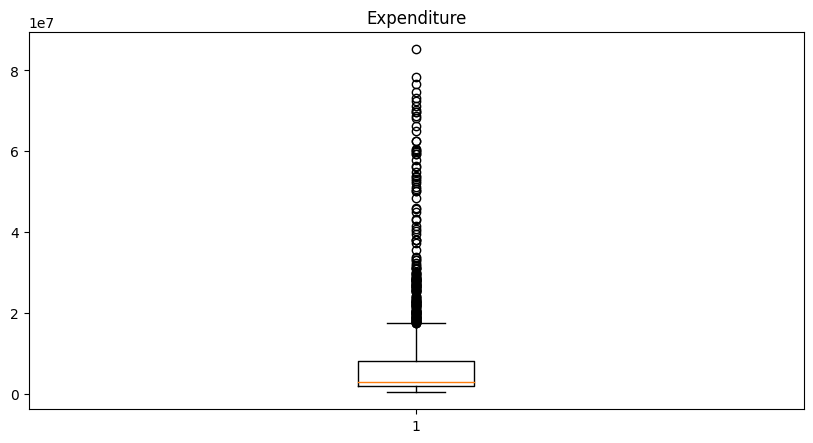

In [14]:
plt.boxplot(filled_df['TOTAL_EXPENDITURE'])
plt.title("Expenditure")
plt.show()

In [15]:
#Appling Statistical Tools in Detecting the Outliers

In [18]:
from scipy.stats import zscore

In [21]:
zscores = zscore(filled_df["TOTAL_REVENUE"])

In [22]:
for i in range(1,5):
    print("The score threshold is: {}".format(i))
    print("The indices of the outliers:")
    print(np.where(zscores > i))
    print("Number of outliers is: {}".format(len((np.where(zscores > i)[0]))))
    print('--'*40)

The score threshold is: 1
The indices of the outliers:
(array([   4,   32,   55,   83,   94,  106,  134,  145,  157,  185,  196,
        208,  236,  247,  259,  287,  298,  310,  338,  349,  361,  389,
        400,  412,  440,  451,  463,  468,  472,  491,  502,  514,  519,
        523,  532,  540,  542,  548,  553,  565,  570,  574,  583,  591,
        593,  596,  599,  604,  616,  621,  625,  634,  642,  644,  647,
        650,  655,  667,  672,  676,  685,  693,  695,  698,  701,  706,
        718,  723,  727,  736,  744,  746,  749,  752,  757,  769,  774,
        778,  787,  795,  797,  800,  803,  808,  820,  825,  826,  829,
        838,  846,  848,  851,  854,  859,  871,  876,  877,  880,  889,
        897,  899,  902,  905,  910,  922,  927,  931,  940,  948,  950,
        953,  956,  961,  973,  978,  979,  982,  991,  999, 1001, 1004,
       1007, 1012, 1024, 1029, 1033, 1042, 1050, 1052, 1055, 1058, 1063,
       1075, 1080, 1084, 1093, 1101, 1103, 1106, 1109, 1114, 1126, 1

In [23]:
zscores2 = zscore(filled_df["TOTAL_EXPENDITURE"])

In [24]:
for i in range(1,5):
    print("The score threshold is: {}".format(i))
    print("The indices of the outliers:")
    print(np.where(zscores > i))
    print("Number of outliers is: {}".format(len((np.where(zscores2 > i)[0]))))
    print('--'*40)

The score threshold is: 1
The indices of the outliers:
(array([   4,   32,   55,   83,   94,  106,  134,  145,  157,  185,  196,
        208,  236,  247,  259,  287,  298,  310,  338,  349,  361,  389,
        400,  412,  440,  451,  463,  468,  472,  491,  502,  514,  519,
        523,  532,  540,  542,  548,  553,  565,  570,  574,  583,  591,
        593,  596,  599,  604,  616,  621,  625,  634,  642,  644,  647,
        650,  655,  667,  672,  676,  685,  693,  695,  698,  701,  706,
        718,  723,  727,  736,  744,  746,  749,  752,  757,  769,  774,
        778,  787,  795,  797,  800,  803,  808,  820,  825,  826,  829,
        838,  846,  848,  851,  854,  859,  871,  876,  877,  880,  889,
        897,  899,  902,  905,  910,  922,  927,  931,  940,  948,  950,
        953,  956,  961,  973,  978,  979,  982,  991,  999, 1001, 1004,
       1007, 1012, 1024, 1029, 1033, 1042, 1050, 1052, 1055, 1058, 1063,
       1075, 1080, 1084, 1093, 1101, 1103, 1106, 1109, 1114, 1126, 1

### If you detect outliers in the TOTAL_REVENUE and TOTAL_EXPENDITURE variables, apply the techniques you learned in this checkpoint to eliminate them and validate that there are no outlier values after you handled them.

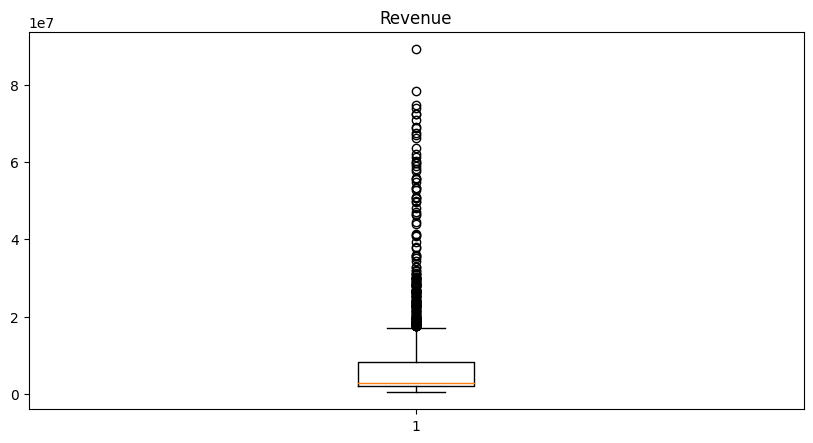

In [33]:
plt.boxplot(filled_df['TOTAL_REVENUE'].dropna())
plt.title("Revenue")
plt.show()

In [34]:
from scipy.stats.mstats import winsorize

In [71]:
winsorizin_revenue = winsorize(np.array(filled_df['TOTAL_REVENUE'].dropna()), (0.15, 0.15))
winsorizin_revenue

masked_array(data=[2678885., 1800909., 3258079., ..., 2044669., 2044669.,
                   2044669.],
             mask=False,
       fill_value=1e+20)

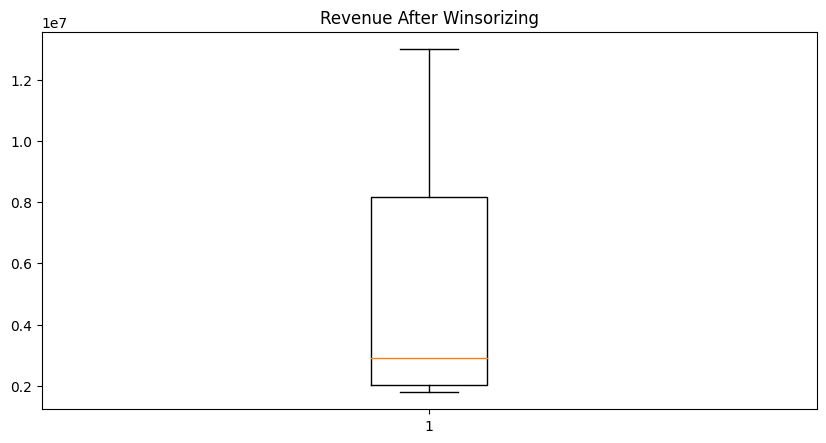

In [73]:
plt.boxplot(winsorizin_revenue)
plt.title("Revenue After Winsorizing")
plt.show()

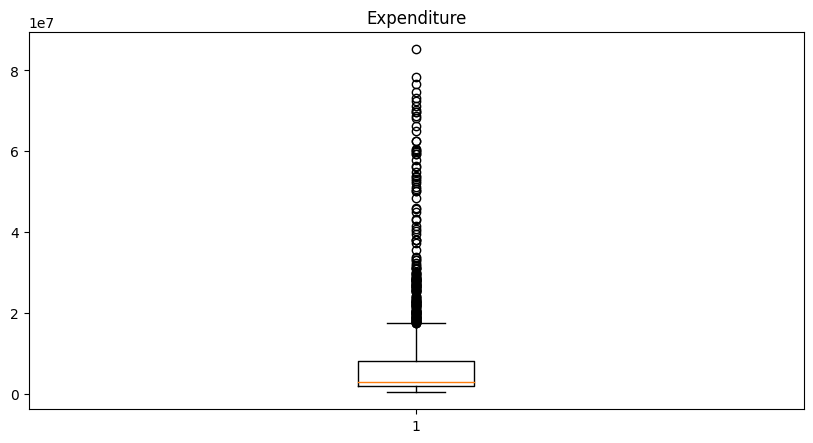

In [74]:
plt.boxplot(filled_df['TOTAL_EXPENDITURE'].dropna())
plt.title("Expenditure")
plt.show()

In [75]:
winsorizing_expenditure = winsorize(np.array(filled_df['TOTAL_EXPENDITURE'].dropna()), (0.15, 0.15))
winsorizing_expenditure

masked_array(data=[2653798., 1809138., 3401580., ..., 2034229., 2034229.,
                   2034229.],
             mask=False,
       fill_value=1e+20)

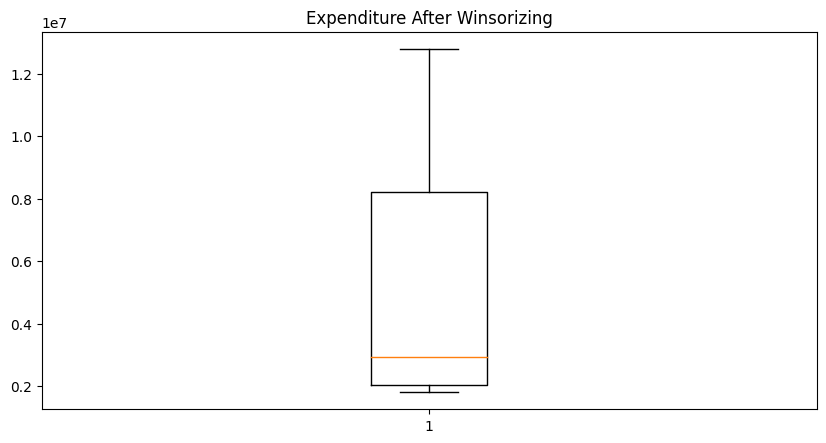

In [76]:
plt.boxplot(winsorizing_expenditure)
plt.title("Expenditure After Winsorizing")
plt.show()

### Create another variable by subtracting the original TOTAL_EXPENDITURE from TOTAL_REVENUE (before you eliminated the outliers). You can think of it as a kind of budget deficit in education. Do you find any outlier values in this new variable? If so, eliminate them using the technique that think is most suitable.

In [48]:
filled_df['PROFIT'] = filled_df['TOTAL_REVENUE'] - filled_df['TOTAL_EXPENDITURE']

In [50]:
filled_df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,PROFIT
0,1992_ALABAMA,ALABAMA,1992,727716.0,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,58025.0,41167.0,472847.0,208148.0,731634.0,208.0,252.0,207.0,255.0,25087.0
1,1992_ALASKA,ALASKA,1992,727716.0,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,8789.0,6714.0,472847.0,208148.0,122487.0,211.5,258.5,208.0,255.0,77103.0
2,1992_ARIZONA,ARIZONA,1992,727716.0,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,49081.0,37410.0,472847.0,208148.0,673477.0,215.0,265.0,209.0,255.0,-143501.0
3,1992_ARKANSAS,ARKANSAS,1992,727716.0,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,36011.0,27651.0,472847.0,208148.0,441490.0,210.0,256.0,211.0,255.0,-31063.0
4,1992_CALIFORNIA,CALIFORNIA,1992,727716.0,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,363296.0,270675.0,472847.0,208148.0,5254844.0,208.0,261.0,202.0,255.0,-878807.0


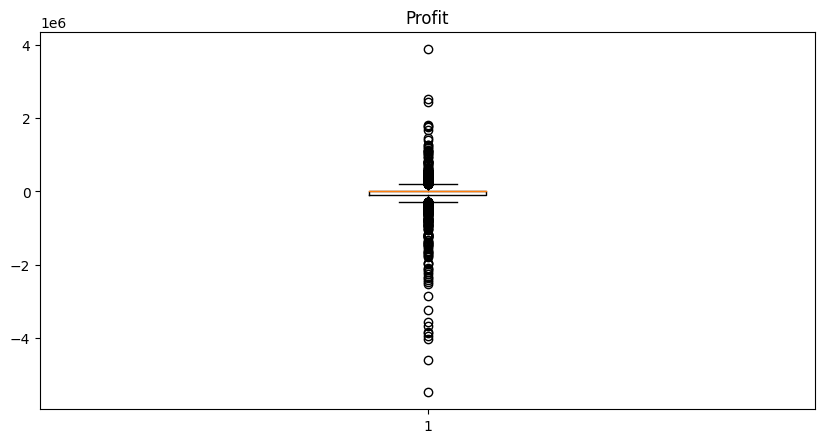

In [51]:
plt.boxplot(filled_df['PROFIT'])
plt.title("Profit")
plt.show()

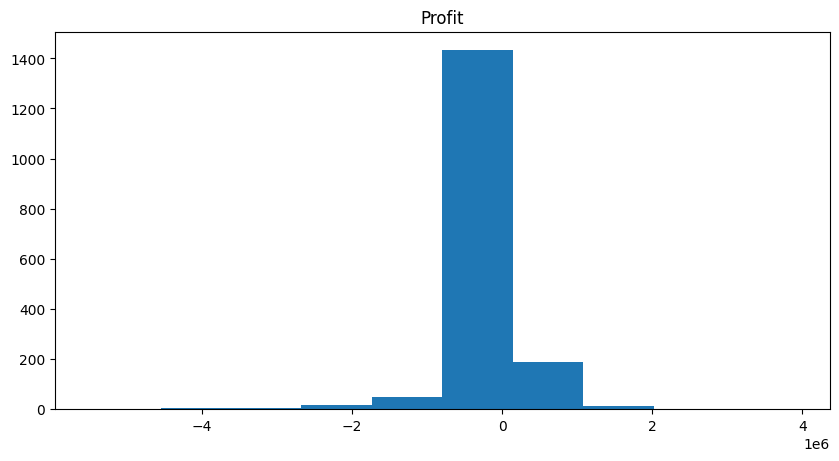

In [52]:
plt.hist(filled_df['PROFIT'])
plt.title("Profit")
plt.show()

In [62]:
zscore3 = zscore(filled_df["PROFIT"])

In [64]:
for i in range(1,5):
    print("The score threshold is: {}".format(i))
    print("The indices of the outliers:")
    print(np.where(zscores > i))
    print("Number of outliers is: {}".format(len((np.where(zscores3 > i)[0]))))
    print('--'*40)

The score threshold is: 1
The indices of the outliers:
(array([  72,   86,   94,  106,  115,  145,  174,  259,  269,  310,  315,
        341,  361,  366,  392,  412,  463,  521,  572,  669,  674,  677,
        720,  725,  732,  735,  776,  778,  787,  800,  830,  851,  881,
        900,  932,  951,  953,  973,  979,  982,  983,  991,  999, 1002,
       1004, 1033, 1034, 1040, 1042, 1050, 1068, 1073, 1077, 1084, 1085,
       1091, 1093, 1106, 1128, 1136, 1144, 1152, 1157, 1160, 1179, 1187,
       1193, 1195, 1203, 1208, 1226, 1228, 1230, 1238, 1245, 1246]),)
Number of outliers is: 76
--------------------------------------------------------------------------------
The score threshold is: 2
The indices of the outliers:
(array([  94,  259,  310,  366,  463,  881,  932,  951,  973,  982,  983,
       1034, 1050, 1085, 1136, 1144, 1157, 1187, 1195, 1208, 1228, 1238,
       1246]),)
Number of outliers is: 23
--------------------------------------------------------------------------------
The 

In [65]:
#Transforming the Outliers

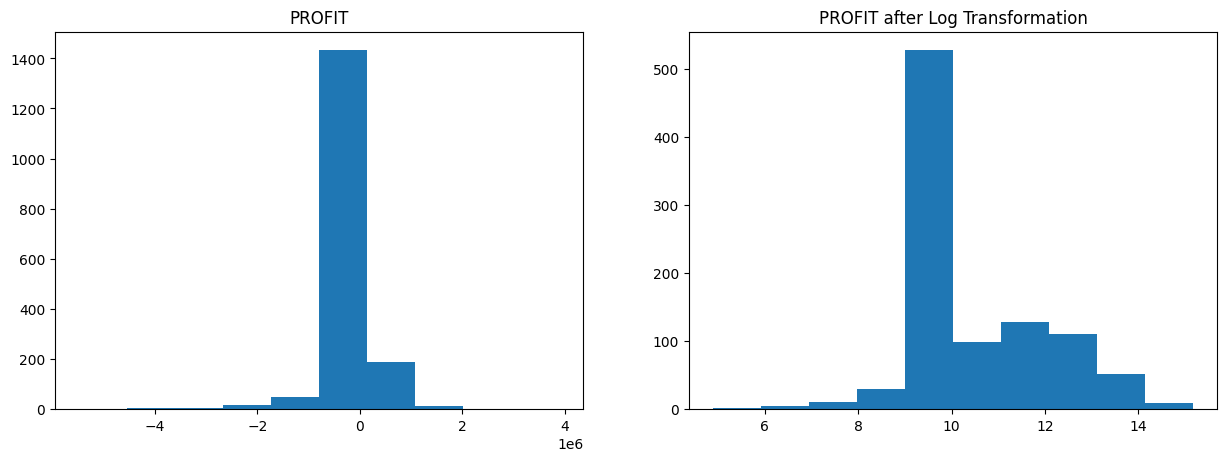

In [68]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.hist(filled_df['PROFIT'].dropna())
plt.title("PROFIT")
plt.subplot(1,2,2)
plt.hist(np.log(filled_df['PROFIT'].dropna()))
plt.title("PROFIT after Log Transformation")
plt.show()

### Now create another variable by subtracting the TOTAL_EXPENDITURE from TOTAL_REVENUE. This time, use the outlier eliminated versions of TOTAL_EXPENDITURE from TOTAL_REVENUE. In this newly created variable, can you find any outliers? If so, eliminate them.

In [80]:
filled_df['PROFIT2'] = winsorizin_revenue - winsorizing_expenditure

In [81]:
filled_df['PROFIT2']

0        25087.0
1        -8229.0
2      -143501.0
3        -8229.0
4       205271.0
          ...   
1710     10440.0
1711     10440.0
1712     10440.0
1713     10440.0
1714     10440.0
Name: PROFIT2, Length: 1715, dtype: float64

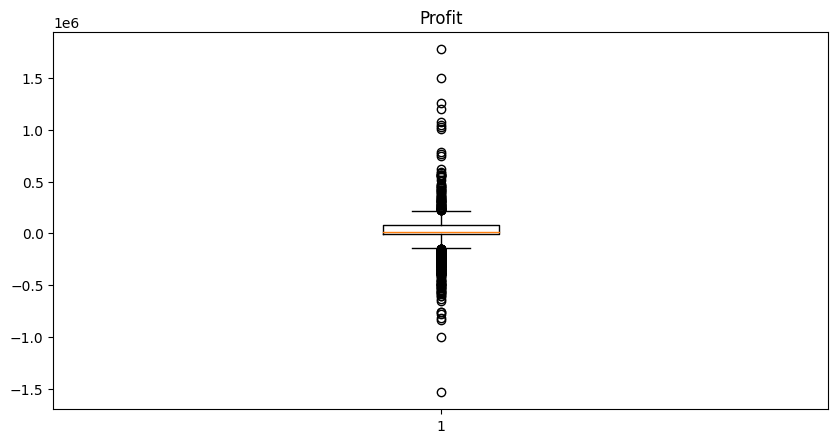

In [82]:
plt.boxplot(filled_df['PROFIT2'])
plt.title("Profit")
plt.show()

In [94]:
filled_df['winsorizing_prifit'] = winsorize(np.array(filled_df['PROFIT2'].dropna()), (0.12, 0.10))
filled_df['winsorizing_prifit']

0        25087.0
1        -8229.0
2      -143501.0
3        -8229.0
4       205271.0
          ...   
1710     10440.0
1711     10440.0
1712     10440.0
1713     10440.0
1714     10440.0
Name: winsorizing_prifit, Length: 1715, dtype: float64

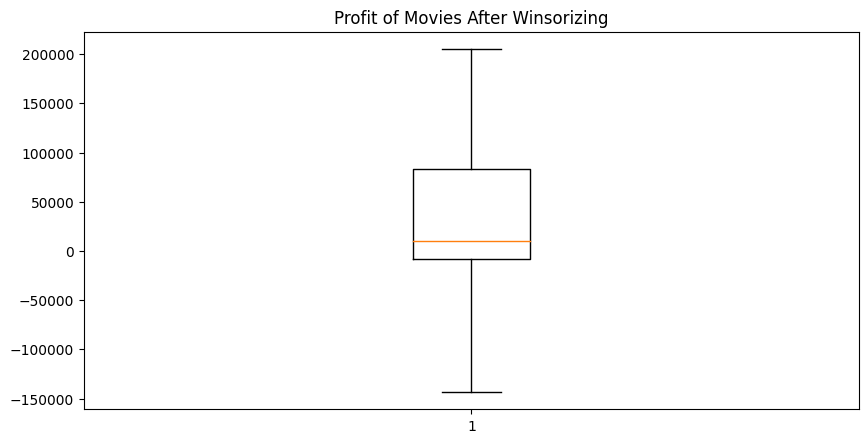

In [95]:
plt.boxplot(filled_df['winsorizing_prifit'])
plt.title("Profit of Movies After Winsorizing")
plt.show()

### Compare some basic descriptive statistics of the budget variables you end up with in the third and the fourth questions. Do you see any differences?

In [97]:
filled_df['winsorizing_prifit'].describe()

count      1715.000000
mean      26092.703790
std      110684.338893
min     -143501.000000
25%       -8229.000000
50%       10440.000000
75%       83368.500000
max      205271.000000
Name: winsorizing_prifit, dtype: float64

In [98]:
filled_df['PROFIT'].describe()

count    1.715000e+03
mean    -7.478590e+04
std      4.976837e+05
min     -5.487742e+06
25%     -1.009060e+05
50%      1.044000e+04
75%      1.807800e+04
max      3.897129e+06
Name: PROFIT, dtype: float64

### If your variable of interest is the budget deficit variable, which method do you think is the most appropriate in dealing with the outliers in this variable: the method in the third question or the one in the fourth question?

By my opinion, the third method will be more accurate when we eliminated outliers only from the final result. 

In the fourth answer, we eliminated outliers three times, in the beginning from each variable we are working with, and then in the final result. 